## MSC Finance & Big Data 
### Data Visualization
#### Session 2

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as pdr

In [2]:
!pip install pandas-datareader

## Reading files

In [3]:
btc=pd.read_csv('BTC-USD.csv', sep=',', index_col="Date")
#engine="pyarrow"
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
file="BTC-USD.xlsx"
sheet="Sheet1"

xl=pd.ExcelFile(file)
btc_xl=xl.parse(sheet, index_col="Date")

btc_xl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
btc.dtypes
# USe function as_numeric is you have 
# a series that is mistakenly considered as an object type

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
btc['Close']["2014-09-20"]

408.903992

In [7]:
from random import gauss, seed

In [8]:
seed(100)
dates=pd.date_range("2022-01-18", periods=5, freq='D')
close=pd.Series((gauss(0,10), gauss(0,10), gauss(0,10),np.nan,gauss(0,10)), 
                index=dates)
close

2022-01-18     6.715533
2022-01-19     8.733197
2022-01-20     2.036165
2022-01-21          NaN
2022-01-22   -15.503492
Freq: D, dtype: float64

In [9]:
close.fillna(method='ffill')

2022-01-18     6.715533
2022-01-19     8.733197
2022-01-20     2.036165
2022-01-21     2.036165
2022-01-22   -15.503492
Freq: D, dtype: float64

In [10]:
close.fillna(method='bfill')

2022-01-18     6.715533
2022-01-19     8.733197
2022-01-20     2.036165
2022-01-21   -15.503492
2022-01-22   -15.503492
Freq: D, dtype: float64

## Concatenate and merge

In [11]:
stocks1=pd.DataFrame({'Stock':['Stock A','Stock B','Stock C'],
                     'Perf 2020':[0.5, 1.6, 3.7],
                     'Perf 2021': [2.1,4.3, -1.3]})

stocks2=pd.DataFrame({'Stock':['Stock D','Stock E','Stock F'],
                     'Perf 2019':[2.5, 1.1, -2.7],
                     'Perf 2020': [2.1,5.3, 4.3]})

stocks1


,Stock,Perf 2020,Perf 2021
0,Stock A,0.5,2.1
1,Stock B,1.6,4.3
2,Stock C,3.7,-1.3


In [12]:
pd.concat([stocks1, stocks2], join="inner").reset_index()

,index,Stock,Perf 2020
0,0,Stock A,0.5
1,1,Stock B,1.6
2,2,Stock C,3.7
3,0,Stock D,2.1
4,1,Stock E,5.3
5,2,Stock F,4.3


In [13]:
sector=pd.DataFrame({'Firm':['Stock A', 'Stock B', 'Stock C', 'Stock D', 'Stock E', 'Stock F'],
                       'Sector':['Oil & Gas', 'Utilities','Financial','Tech',
                                'Consumer','Industrial']       })

sector

,Firm,Sector
0,Stock A,Oil & Gas
1,Stock B,Utilities
2,Stock C,Financial
3,Stock D,Tech
4,Stock E,Consumer
5,Stock F,Industrial


In [14]:
stocks1.merge(sector, left_on='Stock', right_on='Firm')

,Stock,Perf 2020,Perf 2021,Firm,Sector
0,Stock A,0.5,2.1,Stock A,Oil & Gas
1,Stock B,1.6,4.3,Stock B,Utilities
2,Stock C,3.7,-1.3,Stock C,Financial


In [15]:
startdate=dt(2011,1,1)
enddate=dt(2021,1,28)

tesla=pdr.get_data_yahoo('TSLA', start=startdate, end=enddate)
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,5.400,5.180,5.368,5.324,6415000.0,5.324
2011-01-04,5.390,5.204,5.332,5.334,5937000.0,5.334
2011-01-05,5.380,5.238,5.296,5.366,7233500.0,5.366
2011-01-06,5.600,5.362,5.366,5.576,10306000.0,5.576
2011-01-07,5.716,5.580,5.600,5.648,11239500.0,5.648


In [16]:
tesla['Adj Close'].resample('MS').last()

Date
2011-01-01      4.820000
2011-02-01      4.778000
2011-03-01      5.550000
2011-04-01      5.520000
2011-05-01      6.028000
                 ...    
2020-09-01    429.010010
2020-10-01    388.040009
2020-11-01    567.599976
2020-12-01    705.669983
2021-01-01    835.429993
Freq: MS, Name: Adj Close, Length: 121, dtype: float64

In [17]:
tesla["W_return"]=tesla['Adj Close'].pct_change(periods=5)
tesla["D_return"]=tesla['Adj Close'].pct_change()
tesla['LogRet']=np.log(tesla['Adj Close']/tesla['Adj Close'].shift(1))
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,W_return,D_return,LogRet
Date,,,,,,,,,
2011-01-03,5.400,5.180,5.368,5.324,6415000.0,5.324,NaN,NaN,NaN
2011-01-04,5.390,5.204,5.332,5.334,5937000.0,5.334,NaN,0.001878,0.001877
2011-01-05,5.380,5.238,5.296,5.366,7233500.0,5.366,NaN,0.005999,0.005981
2011-01-06,5.600,5.362,5.366,5.576,10306000.0,5.576,NaN,0.039135,0.038389
2011-01-07,5.716,5.580,5.600,5.648,11239500.0,5.648,NaN,0.012912,0.012830


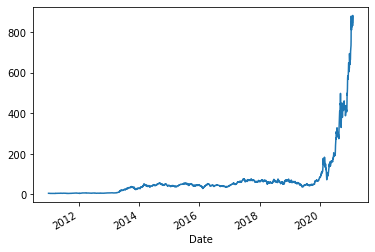

In [18]:
tesla['Adj Close'].plot()
plt.show()

In [19]:
tickers=['GOOG','^GSPC','JNJ','XOM']

df=pdr.get_data_yahoo(tickers, start=startdate, end=enddate)['Adj Close']
df.head()

Symbols,GOOG,^GSPC,JNJ,XOM
Date,,,,
2011-01-03,301.046600,1271.869995,45.400684,47.816837
2011-01-04,299.935760,1270.199951,45.783718,48.041325
2011-01-05,303.397797,1276.560059,45.754814,47.913040
2011-01-06,305.604523,1273.849976,45.682537,48.220909
2011-01-07,307.069031,1271.500000,45.241676,48.483887


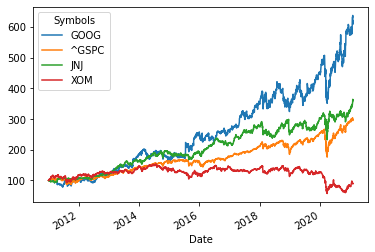

In [20]:
(df/df.iloc[0]*100).plot()
plt.show()

In [21]:
df_flat=df.unstack().reset_index()
df_flat.head()

,Symbols,Date,0
0,GOOG,2011-01-03,301.046600
1,GOOG,2011-01-04,299.935760
2,GOOG,2011-01-05,303.397797
3,GOOG,2011-01-06,305.604523
4,GOOG,2011-01-07,307.069031


In [22]:
df_flat.columns=['Ticker','Date','Close']

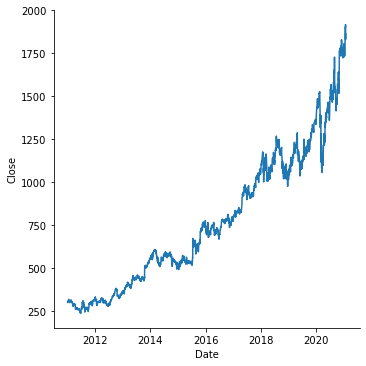

In [23]:
sns.relplot(x='Date', y='Close', kind='line', 
            data=df_flat[df_flat['Ticker']=='GOOG'])

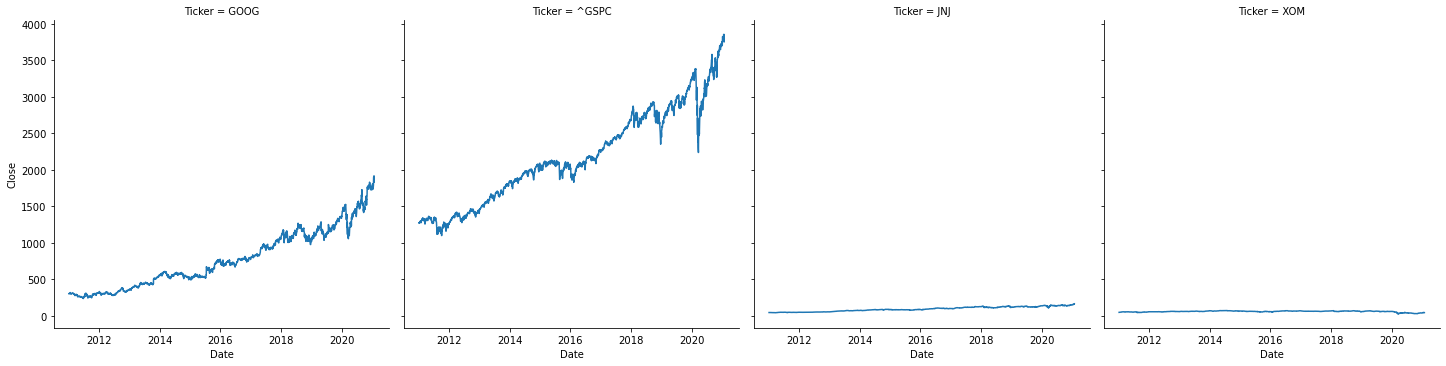

In [24]:
sns.relplot(x="Date",y='Close', kind='line',col='Ticker', data=df_flat)

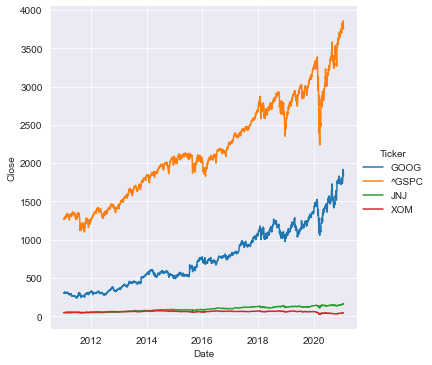

In [25]:
sns.set_style("darkgrid") #darkgrid, dark, white, whitegrid
sns.relplot(x="Date",y='Close', kind='line',hue='Ticker', data=df_flat)

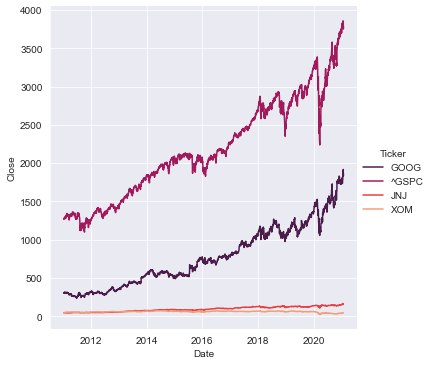

In [26]:
sns.relplot(x="Date",y='Close', kind='line',hue='Ticker', data=df_flat, 
            palette="rocket")

In [27]:
colors=["#0077b5", "#000000", "#86888a","#00a0dc"]
custom=sns.set_palette(sns.set_palette(colors))

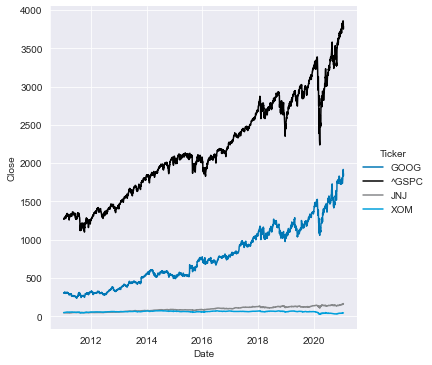

In [28]:
sns.relplot(x="Date",y='Close', kind='line',hue='Ticker', data=df_flat, 
            palette=custom)

In [29]:
sns.set_theme(style="whitegrid", palette=custom, 
              font='sans-serif', font_scale=1.5)

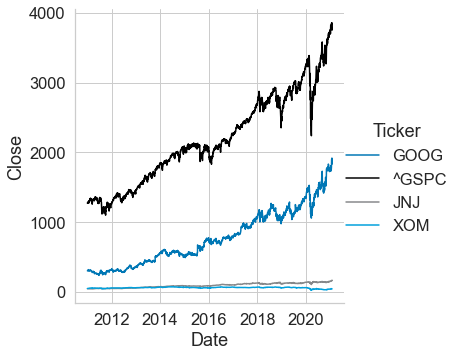

In [30]:
sns.relplot(x="Date",y='Close', kind='line',hue='Ticker', data=df_flat)

✍️ Compute 10, 20, 30 days moving average prices for Apple and plot it

In [31]:
AAPL=pdr.get_data_yahoo("AAPL", start=startdate, end=enddate)['Adj Close']
AAPL.head()

Date
2011-01-03    10.078653
2011-01-04    10.131254
2011-01-05    10.214129
2011-01-06    10.205873
2011-01-07    10.278960
Name: Adj Close, dtype: float64

In [32]:
AAPL=pd.DataFrame({'Date':AAPL.index, 'Close':AAPL.values})
AAPL.head()

,Date,Close
0,2011-01-03,10.078653
1,2011-01-04,10.131254
2,2011-01-05,10.214129
3,2011-01-06,10.205873
4,2011-01-07,10.278960


In [33]:
windows=[10,20,30]

for period in windows:
    column_name="MA for %s days" %(str(period))
    AAPL[column_name]=AAPL["Close"].rolling(period).mean()
AAPL.tail()

,Date,Close,MA for 10 days,MA for 20 days,MA for 30 days
2530,2021-01-22,138.042038,130.286787,130.597972,128.767107
2531,2021-01-25,141.863586,131.365753,131.191552,129.466565
2532,2021-01-26,142.101807,132.773273,131.746916,130.125657
2533,2021-01-27,141.009933,134.089471,132.013430,130.775815
2534,2021-01-28,136.076675,134.704889,132.123610,131.282376


In [34]:
AAPL_flat=pd.melt(AAPL, id_vars='Date', 
                  value_vars=["Close", "MA for 10 days","MA for 20 days","MA for 30 days"])
AAPL_flat.head()

,Date,variable,value
0,2011-01-03,Close,10.078653
1,2011-01-04,Close,10.131254
2,2011-01-05,Close,10.214129
3,2011-01-06,Close,10.205873
4,2011-01-07,Close,10.278960


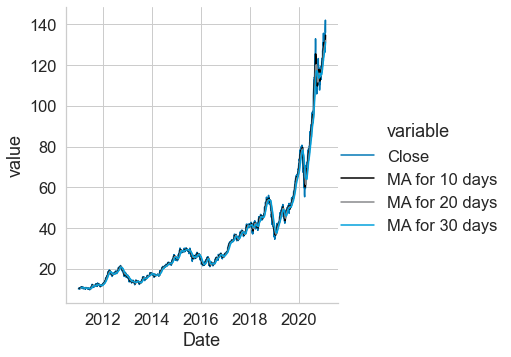

In [35]:
sns.relplot(x="Date", y="value", kind="line", hue="variable", data=AAPL_flat)

In [36]:
stock_ret=df.pct_change()
stock_ret.head()

Symbols,GOOG,^GSPC,JNJ,XOM
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,-0.003690,-0.001313,0.008437,0.004695
2011-01-05,0.011543,0.005007,-0.000631,-0.002670
2011-01-06,0.007273,-0.002123,-0.001580,0.006426
2011-01-07,0.004792,-0.001845,-0.009651,0.005454


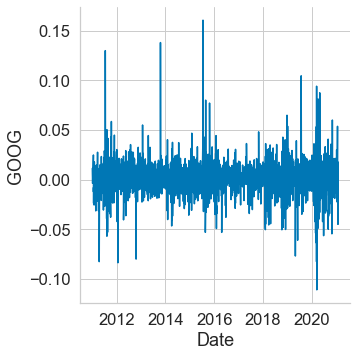

In [37]:
sns.relplot(x="Date", y="GOOG", kind="line", data=stock_ret)

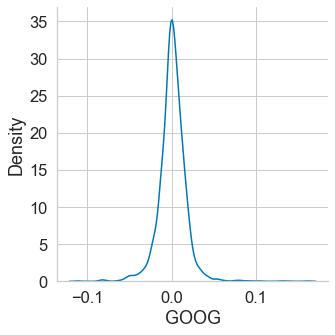

In [38]:
sns.displot(stock_ret['GOOG'].dropna(), kind="kde")

C:\Users\anoku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


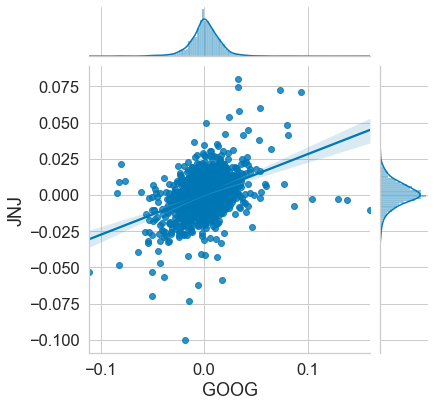

In [39]:
sns.jointplot('GOOG', 'JNJ', stock_ret, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

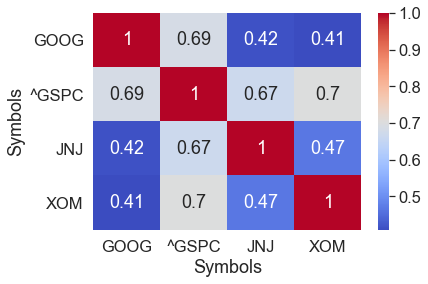

In [40]:
sns.heatmap(stock_ret.corr(), cmap="coolwarm", annot=True)